In [1]:
# Importing the neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [2]:
# File extraction from MySQL
conn = pymysql.connect(host='localhost', port = int(3306), user = 'root',passwd = 'Kushal@0609', db= 'b88')
data = pd.read_sql_query('SELECT * FROM heart_disease', conn)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_22328\2960003445.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('SELECT * FROM heart_disease', conn)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61-65
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,36-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-45
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,56-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,56-60


In [4]:
# No of rows and columns
data.shape

(303, 15)

In [5]:
# getting some info about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  target     303 non-null    int64  
 14  age_group  303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [6]:
# checking for null values
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
age_group    0
dtype: int64

In [ ]:
# no null values

In [7]:
# Statistical measures of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

In [8]:
# checking te distribution of target variable
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# Here 1 represents the Defective_heart and 0 represent the healthy_heart

In [9]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

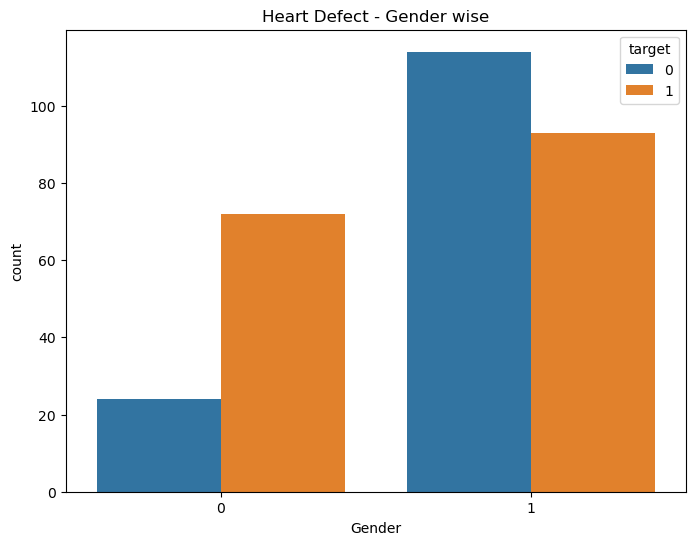

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex', data=data, hue = 'target')
plt.xlabel('Gender')
plt.title('Heart Defect - Gender wise')
plt.show()

In [11]:
gender_counts = data['sex'].value_counts().reset_index()
gender_counts.columns = ['Sex', 'Count']


target_sum_by_gender = data.groupby('sex')['target'].sum().reset_index()
target_sum_by_gender.columns = ['Sex', 'Target Sum']


results = pd.merge(gender_counts, target_sum_by_gender, on='Sex')
print(results)

   Sex  Count  Target Sum
0    1    207          93
1    0     96          72


In [ ]:
# Let's we have more people in gender 1 and less people in gender 0
# Even though less people in gender 0, out of 96, 72 of them are getting heart disease
# and in gender 1, out of 207, 96 of them are getting heart disease

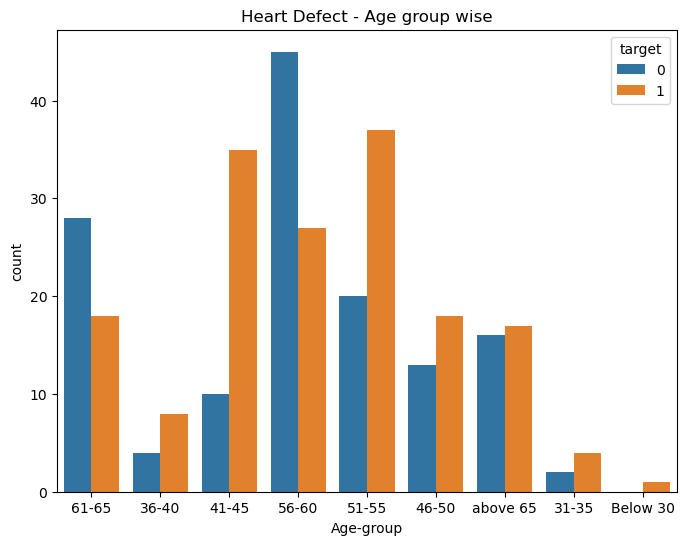

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='age_group', data=data, hue = 'target')
plt.xlabel('Age-group')
plt.title('Heart Defect - Age group wise')
plt.show()

In [13]:
age_group_counts = data['age_group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']


target_sum_by_age_group = data.groupby('age_group')['target'].sum().reset_index()
target_sum_by_age_group.columns = ['Age Group', 'Target Sum']


result_table = pd.merge(age_group_counts, target_sum_by_age_group, on='Age Group')
print(result_table)

  Age Group  Count  Target Sum
0     56-60     72          27
1     51-55     57          37
2     61-65     46          18
3     41-45     45          35
4  above 65     33          17
5     46-50     31          18
6     36-40     12           8
7     31-35      6           4
8  Below 30      1           1


In [ ]:
# This table shows how many of them getting heart disease by age group

In [14]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group'],
      dtype='object')

<Figure size 1200x1200 with 0 Axes>

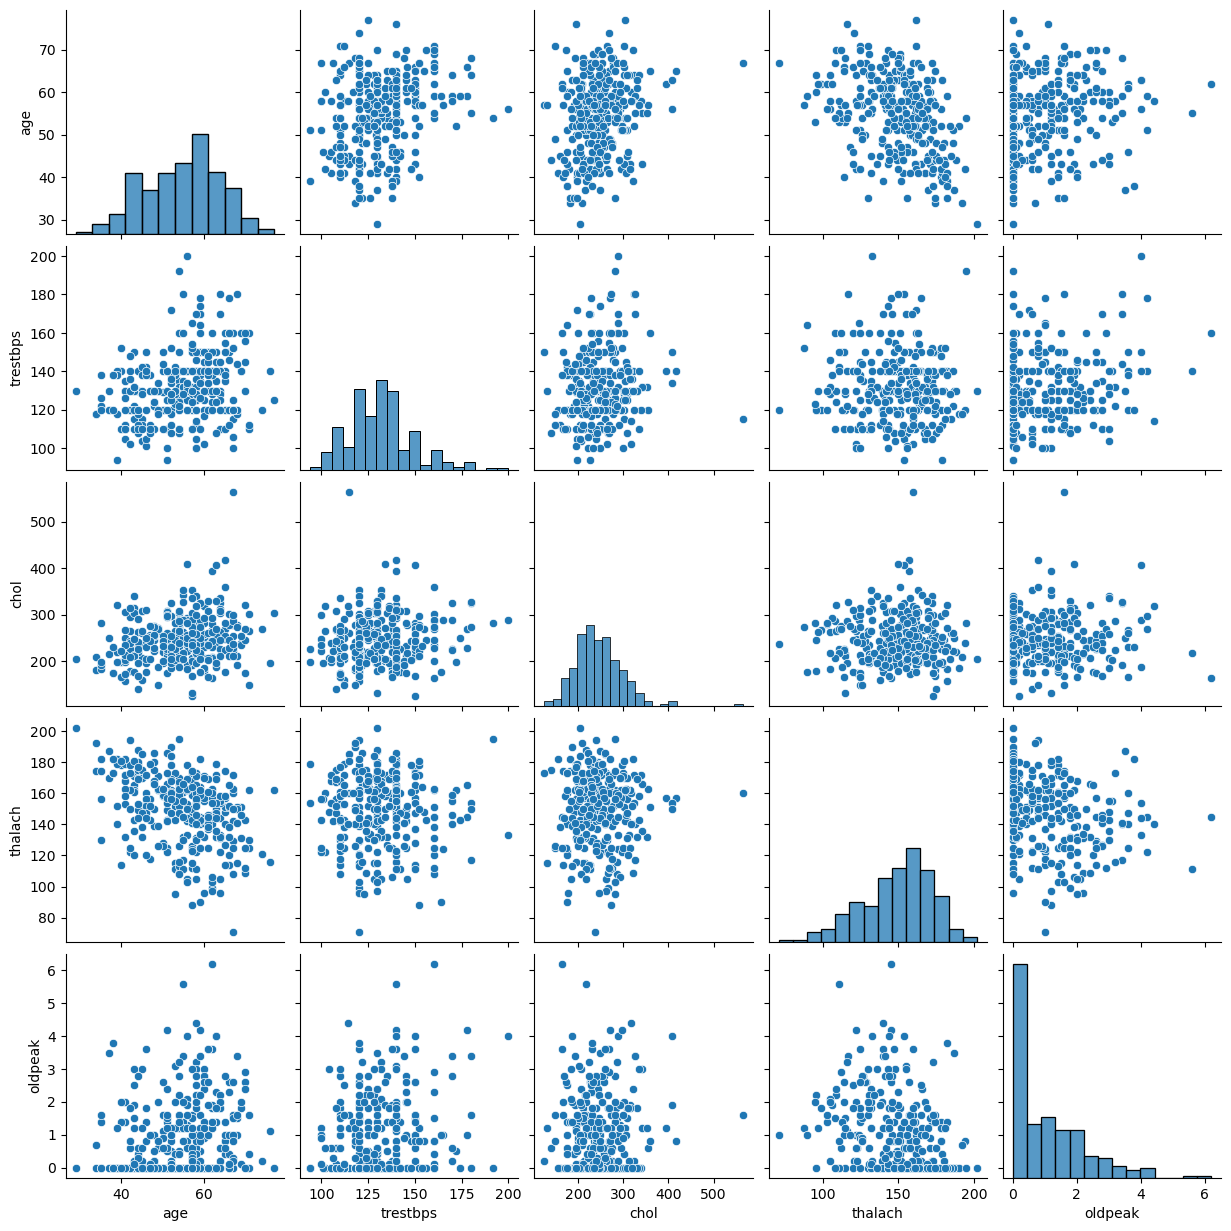

In [16]:
# Distribution of each variable
plt.figure(figsize=(12,12))
sns.pairplot(data[['age','trestbps', 'chol', 'thalach', 'oldpeak' ]])
plt.show()

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_22328\916741028.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


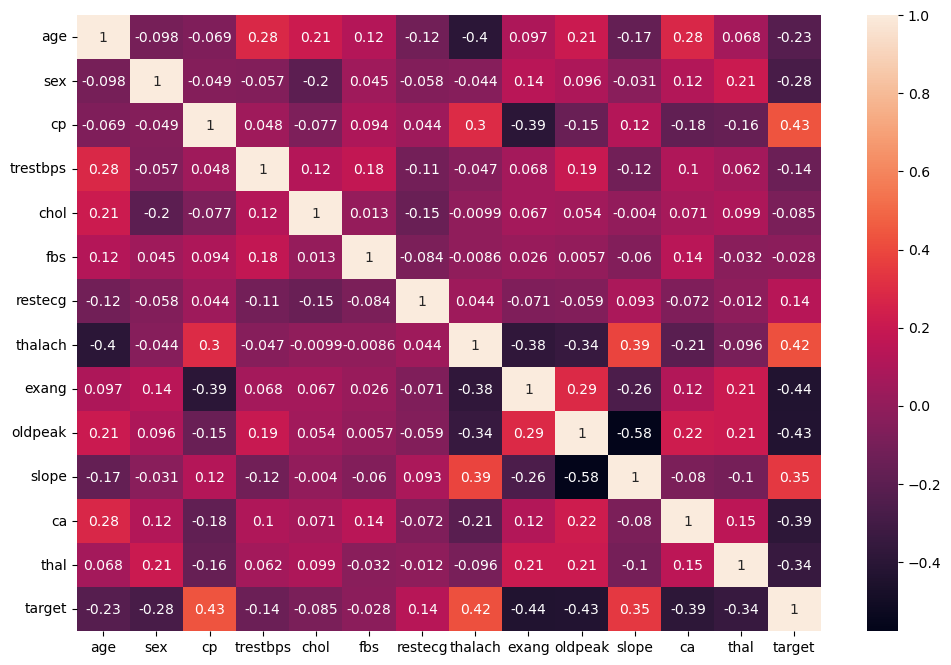

In [17]:
# heat map
plt.figure(figsize=(12,8))
data_corr = data.corr()
sns.heatmap(data_corr, annot=True)
plt.show()

In [ ]:
# we can see that our target variable is more correlated with cp, thalch, exang, oldpeak, slope, ca, thal

# Preprocessing

In [18]:
# converting the categorical column into numerical column
label = LabelEncoder()
data['age_group'] = label.fit_transform(data['age_group'])

In [19]:
# Model Building
X = data.drop('target', axis = 1)
y = data['target']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic regression model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=557)
log = LogisticRegression()
log_model = log.fit(X_train, y_train)
log_pred_train = log_model.predict(X_train)
log_pred_test = log_model.predict(X_test)
print(f'The Training accuracy of the Logistic regression model is {accuracy_score(log_pred_train, y_train)}')
print(f'The Testing accuracy of the Logistic regression model is {accuracy_score(log_pred_test, y_test)}')

The Training accuracy of the Logistic regression model is 0.8471074380165289
The Testing accuracy of the Logistic regression model is 0.9672131147540983


# Decision tree model

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=323)
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree_model = dtree.fit(X_train1, y_train1)
dtree_pred_train = dtree_model.predict(X_train1)
dtree_pred_test = dtree_model.predict(X_test1)
print(f'The Training accuracy of the Decision tree model is {accuracy_score(dtree_pred_train, y_train1)}')
print(f'The Testing accuracy of the Decision tree model is {accuracy_score(dtree_pred_test, y_test1)}')

The Training accuracy of the Decision tree model is 0.9049586776859504
The Testing accuracy of the Decision tree model is 0.9016393442622951


# Randome Forest

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=65)
rf = RandomForestClassifier(n_estimators=50,class_weight=None, max_depth=None, min_samples_leaf=2, min_samples_split=10)
# 'class_weight': None, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50
rf_model = rf.fit(X_train2, y_train2)
rf_pred_train = rf_model.predict(X_train2)
rf_pred_test = rf_model.predict(X_test2)
print(f'The Training accuracy of the Random forest model is {accuracy_score(rf_pred_train, y_train2)}')
print(f'The Testing accuracy of the Random forest model is {accuracy_score(rf_pred_test, y_test2)}')

The Training accuracy of the Random forest model is 0.9256198347107438
The Testing accuracy of the Random forest model is 0.9344262295081968


In [25]:
# Hyper parameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


# KNN classifier

In [26]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=135)
knn = KNeighborsClassifier(n_neighbors=7)
knn_model = knn.fit(X_train3, y_train3)
knn_pred_train = knn_model.predict(X_train3)
knn_pred_test = knn_model.predict(X_test3)
print(f'The Training accuracy of the KNN model is {accuracy_score(knn_pred_train, y_train3)}')
print(f'The Testing accuracy of the KNN model is {accuracy_score(knn_pred_test, y_test3)}')

The Training accuracy of the KNN model is 0.8223140495867769
The Testing accuracy of the KNN model is 0.9508196721311475


In [27]:
%%time
# KNN error method
error = []
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(predict_i, y_test))

CPU times: total: 297 ms
Wall time: 279 ms


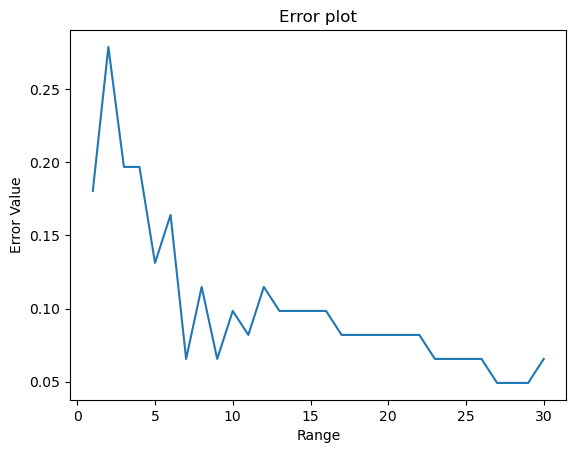

In [28]:
# errorplot
plt.plot(range(1,31), error)
plt.xlabel('Range')
plt.ylabel('Error Value')
plt.title('Error plot')
plt.show() # here 7 is the optimum k-value

# Support Vector machines

In [29]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=135)
sv = SVC()
sv_model = sv.fit(X_train4, y_train4)
sv_pred_train = sv_model.predict(X_train4)
sv_pred_test = sv_model.predict(X_test4)
print(f'The Training accuracy of the Support Vector machine model is {accuracy_score(sv_pred_train, y_train4)}')
print(f'The Testing accuracy of the Support Vector machine model is {accuracy_score(sv_pred_test, y_test4)}')

The Training accuracy of the Support Vector machine model is 0.9008264462809917
The Testing accuracy of the Support Vector machine model is 0.9508196721311475


The index of the maximum value is: 135
CPU times: total: 9.08 s
Wall time: 9.11 s

In [30]:
results = pd.DataFrame(columns=['Algorithm_name', 'Training_accuracy', 'Testing_accuracy', 'Precision_score', 'F1-score'])
results = results.append({
    'Algorithm_name' : 'Logistic_Regression',
    'Training_accuracy' : accuracy_score(y_train, log_pred_train),
    'Testing_accuracy' : accuracy_score(y_test, log_pred_test),
    'Precision_score' : precision_score(y_test, log_pred_test),
    'F1-score': f1_score(y_test, log_pred_test)}, ignore_index=True)

results = results.append({
    'Algorithm_name' : 'Decision_Tree',
    'Training_accuracy' : accuracy_score(y_train1, dtree_pred_train),
    'Testing_accuracy' : accuracy_score(y_test1, dtree_pred_test),
    'Precision_score' : precision_score(y_test1, dtree_pred_test),
    'F1-score': f1_score(y_test1, dtree_pred_test)}, ignore_index=True)

results = results.append({
    'Algorithm_name' : 'Random_Forest',
    'Training_accuracy' : accuracy_score(y_train2, rf_pred_train),
    'Testing_accuracy' : accuracy_score(y_test2, rf_pred_test),
    'Precision_score' : precision_score(y_test2, rf_pred_test),
    'F1-score': f1_score(y_test2, rf_pred_test)}, ignore_index=True)

results = results.append({
    'Algorithm_name' : 'K_nearest_neighbours',
    'Training_accuracy' : accuracy_score(y_train3, knn_pred_train),
    'Testing_accuracy' : accuracy_score(y_test3, knn_pred_test),
    'Precision_score' : precision_score(y_test3, knn_pred_test),
    'F1-score': f1_score(y_test3, knn_pred_test)}, ignore_index=True)

results = results.append({
    'Algorithm_name' : 'Support_Vector_Machine',
    'Training_accuracy' : accuracy_score(y_train4, sv_pred_train),
    'Testing_accuracy' : accuracy_score(y_test4, sv_pred_test),
    'Precision_score' : precision_score(y_test4, sv_pred_test),
    'F1-score': f1_score(y_test4, sv_pred_test)}, ignore_index=True)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_22328\3414880357.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_22328\3414880357.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_22328\3414880357.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_22328\3414880357.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_22328\3414880357.py:30: FutureWar

In [31]:
results

,Algorithm_name,Training_accuracy,Testing_accuracy,Precision_score,F1-score
0,Logistic_Regression,0.847107,0.967213,0.974359,0.974359
1,Decision_Tree,0.904959,0.901639,0.916667,0.916667
2,Random_Forest,0.925620,0.934426,0.966667,0.935484
3,K_nearest_neighbours,0.822314,0.950820,0.916667,0.956522
4,Support_Vector_Machine,0.900826,0.950820,0.916667,0.956522


In [ ]:
# Considering all the above metrics, all of our model is performing well. The choice depend on our 
# specific requirements. Here I am considering based on the Testing accuracy, precision_score and 
# F1-score with that I choose Logtistic regression as my Ideal model